# TRAFFIC ACCIDENTS AND VIOLATIONS ANALYSIS

Why analysis of traffic accidents and violations required?
-------------------------------------------------------------

* To understand the number of traffic violations and accidents occuring in state/city (due to alcohol, belts)

* To analyse 
        
        1) Vehicle types involved in accidents
        2) Personal injuries and Property damages
        3) The number of Fatal accidents
        4) Various Violation Types
        5) Accidents/Violations occuring in workzones


Algorithm Used:
---------------
    
• Pandas and Numpy
• Clustering Algorithm
• Association rules (Apriori Algorithm)
• Data Visualization 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("data\Traffic_Violations.csv")

In [567]:
data.shape

(1048575, 23)

### Data Preprocessing: 

Eliminating the null values and columns/attributes that are not essential and making the data ready for the analysis

In [7]:
## remove the rows that has atleast one NaN value

In [6]:
pre_data = data.dropna(how='any')

In [8]:
data_upd = data.dropna(how='any')
data_upd.head()

,Date Of Stop,Time Of Stop,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,...,Work Zone,State,VehicleType,Year,Make,Violation Type,Charge,Contributed To Accident,Gender,Arrest Type
1,08/29/2017,10:19:00,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,No,No,No,...,No,VA,02 - Automobile,2001.0,TOYOTA,Citation,21-201(a1),No,F,A - Marked Patrol
2,12/01/2014,12:52:00,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,No,...,No,MD,02 - Automobile,2001.0,HONDA,Citation,21-403(b),No,F,A - Marked Patrol
3,08/29/2017,9:22:00,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,No,No,...,No,MD,02 - Automobile,1998.0,DODG,Citation,21-402(b),No,M,A - Marked Patrol
6,10/08/2013,13:23:00,"4th district, Wheaton",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,GEORGIA AVE / BEL PRE RD,39.093383,-77.079552,No,No,No,...,No,MD,02 - Automobile,1993.0,FORD,Citation,13-401(h),No,M,A - Marked Patrol
10,02/14/2014,20:10:00,"1st district, Rockville",FAILURE TO DRIVE ON RIGHT HAND ROADWAY OF DIVI...,GATEWAY CENTER DR @ CLARKSBURG RD,39.234843,-77.281540,No,No,No,...,No,MD,02 - Automobile,2005.0,CADI,Citation,21-311(1),No,M,A - Marked Patrol


Assign unique number to each value in the column "State" of the panda dataframe

In [9]:
names = data_upd.State.unique()
col_labels = pd.Series(np.arange(len(names)), names)
col_labels[:5]

VA    0
MD    1
DC    2
PA    3
NY    4
dtype: int32

In [10]:
names

array(['VA', 'MD', 'DC', 'PA', 'NY', 'TN', 'DE', 'XX', 'MA', 'WV', 'FL',
       'US', 'IN', 'NJ', 'MI', 'CA', 'GA', 'OH', 'OK', 'WA', 'SC', 'CT',
       'NC', 'IL', 'AL', 'VI', 'MO', 'TX', 'KY', 'AZ', 'ME', 'ON', 'NH',
       'NM', 'MS', 'LA', 'RI', 'NV', 'MN', 'ID', 'WI', 'AR', 'VT', 'CO',
       'OR', 'AK', 'KS', 'NB', 'MT', 'MB', 'IA', 'UT', 'PR', 'HI', 'AB',
       'NE', 'WY', 'NF', 'QC', 'SD', 'ND', 'PQ', 'MH', 'PE', 'BC', 'GU',
       'NS', 'AS'], dtype=object)

In [12]:
d = data_upd[['State']].applymap(col_labels.get) # Apply label to each value in the column "State"
data_upd.loc[:,'State'] = d ## Update the row "State" in the dataframe

### Clustering

Divide the data into clusters based on the labels assigned to each value in the column "State" of panda dataframe

In [13]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=5, max_iter=1000, random_state=1).fit(data_upd.iloc[:, 14:15])

labels = kmeans_model.labels_

#print(pd.crosstab(labels, data_upd["State"]))
data_cluster = pd.DataFrame(labels, data_upd)

In [14]:
kmeans_model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [15]:
data_upd.loc[:,'State'] = labels 

In [14]:
la = kmeans_model.predict(data_upd.iloc[:, 14:15])
la

array([0, 0, 0, ..., 0, 0, 0])

In [568]:
## display the rows that are present in each cluster

In [16]:
cluster = pd.DataFrame()
for i in range(5):
    cluster[i] = np.where(labels==i)
    
cluster

,0,1,2,3,4
0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1422, 1481, 1771, 1836, 1923, 2291, 2294, 233...","[6955, 7228, 8972, 8973, 8974, 8975, 8976, 897...","[87, 95, 120, 149, 163, 208, 239, 326, 366, 40...","[407, 539, 759, 843, 903, 932, 960, 966, 1035,..."


In [18]:
pre_data.loc[:, 'State_lab'] = data_upd['State']

In [569]:
## display the states that are present in each cluster

In [19]:
tv1 = (pre_data.loc[pre_data['State_lab'] == 0])
print "States in Cluster 1"
print tv1['State'].unique()
tv2 = (pre_data.loc[pre_data['State_lab'] == 1])
print "States in Cluster 2"
print tv2['State'].unique()
tv3 = (pre_data.loc[pre_data['State_lab'] == 2])
print "States in Cluster 3"
print tv3['State'].unique()
tv4 = (pre_data.loc[pre_data['State_lab'] == 3])
print "States in Cluster 4"
print tv4['State'].unique()
tv5 = (pre_data.loc[pre_data['State_lab'] == 4])
print "States in Cluster 5"
print tv5['State'].unique()

States in Cluster 1
['VA' 'MD' 'DC' 'PA' 'NY']
States in Cluster 2
['CT' 'NC' 'IL' 'AL' 'VI' 'MO' 'TX' 'KY' 'AZ' 'ME' 'ON' 'NH' 'NM']
States in Cluster 3
['MS' 'LA' 'RI' 'NV' 'MN' 'ID' 'WI' 'AR' 'VT' 'CO' 'OR' 'AK' 'KS' 'NB' 'MT'
 'MB' 'IA' 'UT' 'PR' 'HI' 'AB' 'NE' 'WY' 'NF' 'QC' 'SD' 'ND' 'PQ' 'MH' 'PE'
 'BC' 'GU' 'NS' 'AS']
States in Cluster 4
['TN' 'DE' 'XX' 'MA' 'WV' 'FL' 'US' 'IN']
States in Cluster 5
['NJ' 'MI' 'CA' 'GA' 'OH' 'OK' 'WA' 'SC']


Association Rules
-------------------

Association rules analysis is a technique to uncover how items are associated to each other. 

There are three common ways to measure association:

* Measure 1: Support - This says how popular an itemset is, as measured by the proportion of transactions in which an itemset     appears.


* Measure 2: Confidence - This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is 
  measured by the proportion of transactions with item X, in which item Y also appears.
  

* Measure 3: Lift - This says how likely item Y is purchased when item X is purchased, while controlling for how popular item     Y is.

In [467]:
tv1_assoc = tv1.loc[:, ['Accident','Belts','Personal Injury','Property Damage','Fatal','Alcohol','Work Zone','State','VehicleType','Violation Type','Contributed To Accident','Gender']]

In [20]:
import apriori as ap

In [468]:
tv1_assoc.to_csv('tv1.csv')
#tv2.to_csv('tv2.csv')
#tv3.to_csv('tv3.csv')
#tv4.to_csv('tv4.csv')
#tv5.to_csv('tv5.csv')

In [482]:
#dataset5 = [line.split(',') for line in open('tv5.csv').readlines()]
dataset1 = [line.strip().split(',') for line in open('tv1.csv').readlines()]
set1 = []
for s in dataset1:
    t = [u for u in s]
    set1.append(t)

In [575]:
L, support = ap.apriori(set1[:30000], minSupport=0.5)

In [ ]:
#ruleList = ap.generateRules(L, support, minConf=0.8)

In [576]:
rules = ap.generateRules(L, support)

frozenset(['02 - Automobile']) --> frozenset(['MD']) conf: 0.91346923917
frozenset(['MD']) --> frozenset(['02 - Automobile']) conf: 0.916137276378
frozenset(['Citation']) --> frozenset(['02 - Automobile']) conf: 0.916618595626
frozenset(['No']) --> frozenset(['MD']) conf: 0.913030434348
frozenset(['MD']) --> frozenset(['No']) conf: 1.0
frozenset(['M']) --> frozenset(['MD']) conf: 0.906317663475
frozenset(['M']) --> frozenset(['No']) conf: 1.0
frozenset(['Citation']) --> frozenset(['No']) conf: 1.0
frozenset(['M']) --> frozenset(['02 - Automobile']) conf: 0.907520569696
frozenset(['Citation']) --> frozenset(['MD']) conf: 0.911531805548
frozenset(['No']) --> frozenset(['02 - Automobile']) conf: 0.915697189906
frozenset(['02 - Automobile']) --> frozenset(['No']) conf: 1.0
freqSet: frozenset(['MD', 'Citation', '02 - Automobile'])
frozenset(['Citation', '02 - Automobile']) --> frozenset(['MD']) conf: 0.912409176726
frozenset(['MD', 'Citation']) --> frozenset(['02 - Automobile']) conf: 0.917

In [20]:
f = tv1.loc[(tv1['Gender'] == 'F') & (tv1['Contributed To Accident'] == 'Yes')]
f['Gender'].count()

7239

In [21]:
acc1 = tv1.loc[tv1['Contributed To Accident'] == 'Yes']
acc_count1 = acc1['Gender'].value_counts()
acc2 = tv2.loc[tv2['Contributed To Accident'] == 'Yes']
acc_count2 = acc2['Gender'].value_counts()
acc3 = tv3.loc[tv3['Contributed To Accident'] == 'Yes']
acc_count3 = acc3['Gender'].value_counts()
acc4 = tv4.loc[tv4['Contributed To Accident'] == 'Yes']
acc_count4 = acc4['Gender'].value_counts()
acc5 = tv5.loc[tv5['Contributed To Accident'] == 'Yes']
acc_count5 = acc5['Gender'].value_counts()

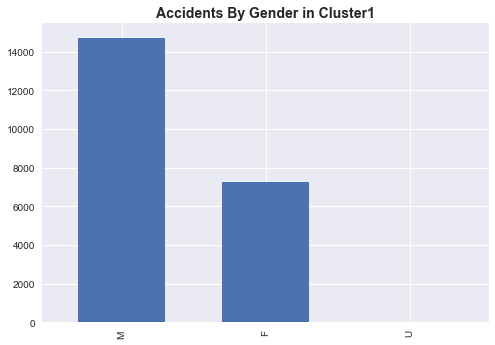

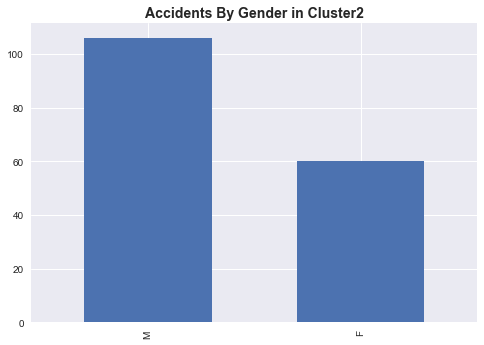

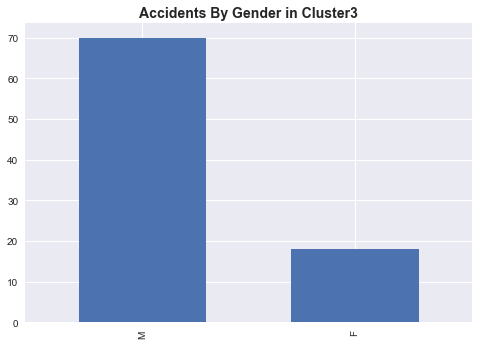

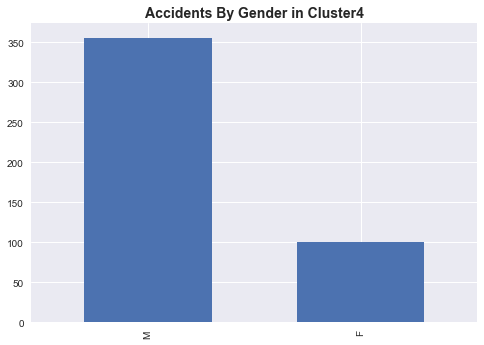

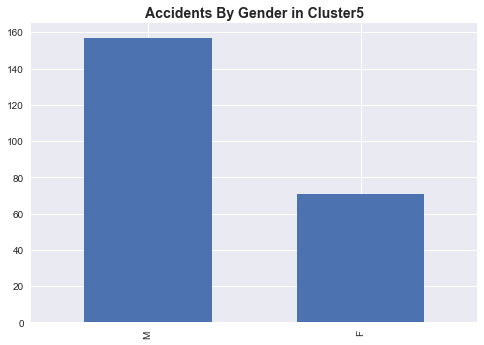

In [25]:
ax1=acc_count1.plot(kind='bar', width = 0.6, align='center',fontsize=10)
ax1.set_title('Accidents By Gender in Cluster1',fontsize=14, fontweight='bold')
plt.show()

ax2=acc_count2.plot(kind='bar', width = 0.6, align='center',fontsize=10)
ax2.set_title('Accidents By Gender in Cluster2',fontsize=14, fontweight='bold')
plt.show()

ax3=acc_count3.plot(kind='bar', width = 0.6, align='center',fontsize=10)
ax3.set_title('Accidents By Gender in Cluster3',fontsize=14, fontweight='bold')
plt.show()

ax4=acc_count4.plot(kind='bar', width = 0.6, align='center',fontsize=10)
ax4.set_title('Accidents By Gender in Cluster4',fontsize=14, fontweight='bold')
plt.show()

ax5=acc_count5.plot(kind='bar', width = 0.6, align='center',fontsize=10)
ax5.set_title('Accidents By Gender in Cluster5',fontsize=14, fontweight='bold')
plt.show()

In [23]:
acc = tv1.loc[tv1['Contributed To Accident'] == 'Yes']
acc_count =  acc['Gender'].value_counts()
acc_count

M    14720
F     7239
U       18
Name: Gender, dtype: int64

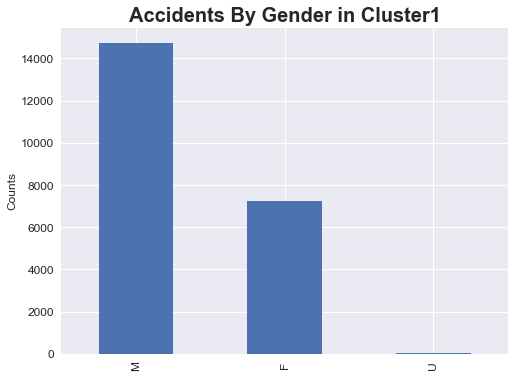

In [437]:
ax = acc_count.plot(kind='bar', figsize=(8, 6), fontsize=12)
ax.set_title('Accidents By Gender in Cluster1', fontsize=20, fontweight='bold')
ax.set_ylabel("Counts", fontsize=12)
plt.show()

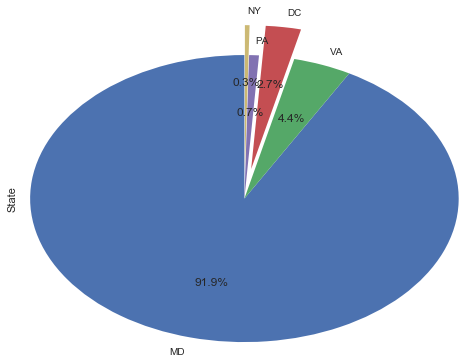

In [27]:
z = tv1.loc[:, ['State' ,'Gender', 'Contributed To Accident']]
z['Contributed To Accident'] = 'Yes'
(z['State'].value_counts()).plot(kind='pie', startangle=90, explode=(0, 0, 0.25, 0, 0.25), autopct='%1.1f%%', radius=1.2)
plt.show()

In [28]:
tv1_ = tv1.loc[:, ['State' ,'Belts', 'Fatal', 'Personal Injury', 'Property Damage','Work Zone','Alcohol', 'Gender', 'Violation Type', 'Contributed To Accident']]

In [29]:
tv1_ = tv1_.loc[tv1_['Contributed To Accident'] == 'Yes']
tv1_['Violation Type'].value_counts()

Citation    20597
Warning      1251
ESERO         124
SERO            5
Name: Violation Type, dtype: int64

In [30]:
f = tv1_.loc[(tv1_['Gender'] == 'M') & (tv1_['Work Zone'] == 'Yes') & (tv1_['Contributed To Accident'] == 'Yes')]
f

,State,Belts,Fatal,Personal Injury,Property Damage,Work Zone,Alcohol,Gender,Violation Type,Contributed To Accident
938093,MD,No,No,No,Yes,Yes,No,M,Citation,Yes


In [31]:
#tv1_ac = tv1_.loc[(tv1_['Gender'] == 'F') & (tv1_['Contributed To Accident'] == 'Yes')]
df = pd.DataFrame()
alcohol = tv1_.loc[tv1_['Alcohol'] == 'Yes'] 
fatal = tv1_.loc[tv1_['Fatal'] == 'Yes']
prodamage = tv1_.loc[tv1_['Property Damage'] == 'Yes']
perinjury = tv1_.loc[tv1_['Personal Injury'] == 'Yes']
workzone = tv1_.loc[tv1_['Work Zone'] == 'Yes']
df['Alcohol'] = alcohol.Gender.value_counts()
df['Fatal'] = fatal.Gender.value_counts()
df['Property Damage'] = prodamage.Gender.value_counts()
df['Personal Injury'] = perinjury.Gender.value_counts()
df['Work Zone'] = workzone.Gender.value_counts()
df

,Alcohol,Fatal,Property Damage,Personal Injury,Work Zone
M,64,19,5202,3605,1
F,15,15,2247,2025,1


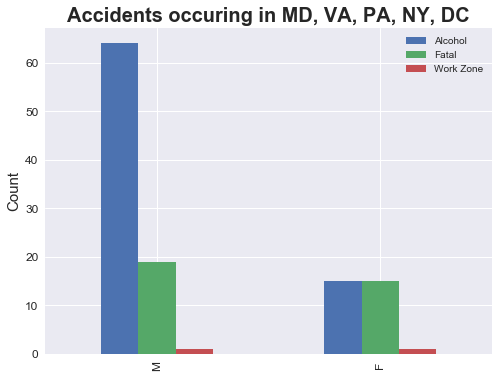

In [32]:
ax = df[['Alcohol', 'Fatal', 'Work Zone']].plot(kind='bar', figsize=(8, 6), fontsize=12)
ax.set_title('Accidents occuring in MD, VA, PA, NY, DC', fontsize=20, fontweight='bold')
ax.set_ylabel("Count", fontsize=15)
plt.show()

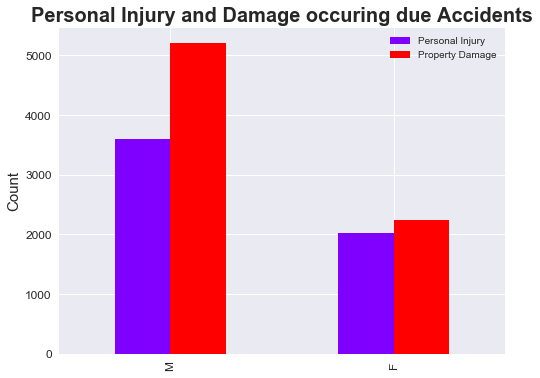

In [38]:
ax = df[['Personal Injury', 'Property Damage']].plot(kind='bar', figsize=(8, 6), fontsize=12, cmap=plt.cm.rainbow)
ax.set_title('Personal Injury and Damage occuring due Accidents', fontsize=20, fontweight='bold')
ax.set_ylabel("Count", fontsize=15)
plt.show()

In [34]:
tv1_1 = tv1.loc[:, ['State' ,'Belts', 'Fatal', 'Alcohol', 'Gender', 'Property Damage', 'Violation Type', 'VehicleType', 'Contributed To Accident']]

In [35]:
df2 = pd.DataFrame()
tv1_accident = tv1_1.loc[tv1_1['Contributed To Accident'] == 'Yes']
df2['VehicleType'] = (tv1_accident['VehicleType'].value_counts()).head()
df2

,VehicleType
02 - Automobile,19382
05 - Light Duty Truck,1069
28 - Other,418
03 - Station Wagon,307
01 - Motorcycle,272


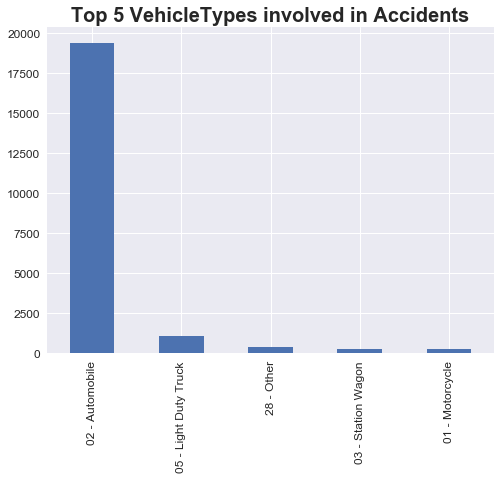

In [37]:
x1 = df2['VehicleType'].plot(kind='bar',figsize=(8, 6), fontsize=12 )
x1.set_title('Top 5 VehicleTypes involved in Accidents',fontsize=20, fontweight='bold')
plt.show()

In [328]:
state_nm = tv1_up['State'].unique()
col1 = pd.Series(np.arange(len(state_nm)), state_nm)
tv1_up.loc[:,'State'] = tv1_up[['State']].applymap(col1.get)

In [329]:
viotype = tv1_up['Violation Type'].unique()
col4 = pd.Series(np.arange(len(viotype)), viotype)
tv1_up.loc[:,'Violation Type'] = tv1_up[['Violation Type']].applymap(col4.get)

In [330]:
gender_nm = tv1_up['Gender'].unique()
col2 = pd.Series(np.arange(len(gender_nm)), gender_nm)
tv1_up.loc[:,'Gender'] = tv1_up[['Gender']].applymap(col2.get)

In [331]:
accident_con = tv1_up['Contributed To Accident'].unique()
col3 = pd.Series(np.arange(len(accident_con)), accident_con)
tv1_up.loc[:,'Contributed To Accident'] = tv1_up[['Contributed To Accident']].applymap(col3.get)
tv1_up.loc[:,'Belts'] = tv1_up[['Belts']].applymap(col3.get)
tv1_up.loc[:,'Fatal'] = tv1_up[['Fatal']].applymap(col3.get)
tv1_up.loc[:,'Alcohol'] = tv1_up[['Alcohol']].applymap(col3.get)

In [332]:
from sklearn.preprocessing import StandardScaler

P = tv1_up.iloc[:,0:8]
# standardizing and PCA
scaler = StandardScaler()
P_scaled=scaler.fit_transform(P)
P_scaled=pd.DataFrame(P_scaled)
PP=P_scaled.drop(P_scaled.columns[[1, 4, 6, 2, 5,3]], axis=1) 
pca=PCA(n_components=0.85)
P_pca=pca.fit_transform(PP)
print (P_pca.shape)

(921316L, 1L)


In [333]:
tv1_up.State.unique()

array([0, 1, 2, 3, 4], dtype=int64)

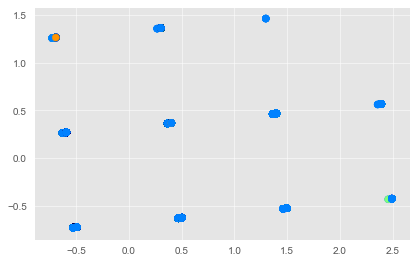

In [574]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)

plot_columns = pca_2.fit_transform(tv1_up.iloc[:,3:8])

plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=tv1_up["State"], cmap=plt.cm.jet)
plt.show()

DATA SOURCE:
------------

• https://data.montgomerycountymd.gov/Public-Safety/Traffic-Violations/4mse-ku6q

# REFERENCES:

• https://www.dataquest.io/blog/k-means-clustering-us-senators/

• http://www.ijritcc.org/download/browse/Volume_4_Issues/May_16_Volume_4_Issue_5/1465367456_08-06-2016.pdf

• https://link.springer.com/article/10.1186/s40537-015-0035-y

• https://www.researchgate.net/publication/284282571_A_data_mining_framework_to_analyze_road_accident_data

• http://www.ijritcc.org/download/browse/Volume_4_Issues/July_16_Volume_4_Issue_7/1468993772_20-07-2016.pdf

• http://www.ibmbigdatahub.com/blog/6-ways-analytics-can-help-manage-traffic-and-reduce-accidents

